In [97]:
%matplotlib notebook
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import operator

In [96]:
def classify(x, dataset, labels, k):
    dataset_size = dataset.shape[0]
    diff_mat = np.tile(x, (dataset_size, 1)) - dataset
    square_diff = diff_mat ** 2
    square_distances = square_diff.sum(axis = 1)
    distances = square_distances ** 0.5
    sorted_distance_indices = distances.argsort()
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_distance_indices[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    sorted_class_count = sorted(class_count.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_class_count[0][0]

In [85]:
def open_file(filename):
    love_dictionary = {
        'largeDoses': 3, 
        'smallDoses': 2, 
        'didntLike': 1}
    f = open(filename)
    lines = f.readlines()
    number_of_lines = len(lines)
    X = np.zeros((number_of_lines, 3))
    y = []
    index = 0
    for line in lines:
        line = line.strip()
        list_from_line = line.split('\t')
        X[index, :] = list_from_line[0:3]
        y.append(love_dictionary[list_from_line[-1]])
        index += 1
    return X, y

In [86]:
X, y = open_file('datingTestSet.txt')
X, y[0:20]

(array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
        [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
        [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
        ..., 
        [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
        [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
        [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]]),
 [3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3])

<IPython.core.display.Javascript object>


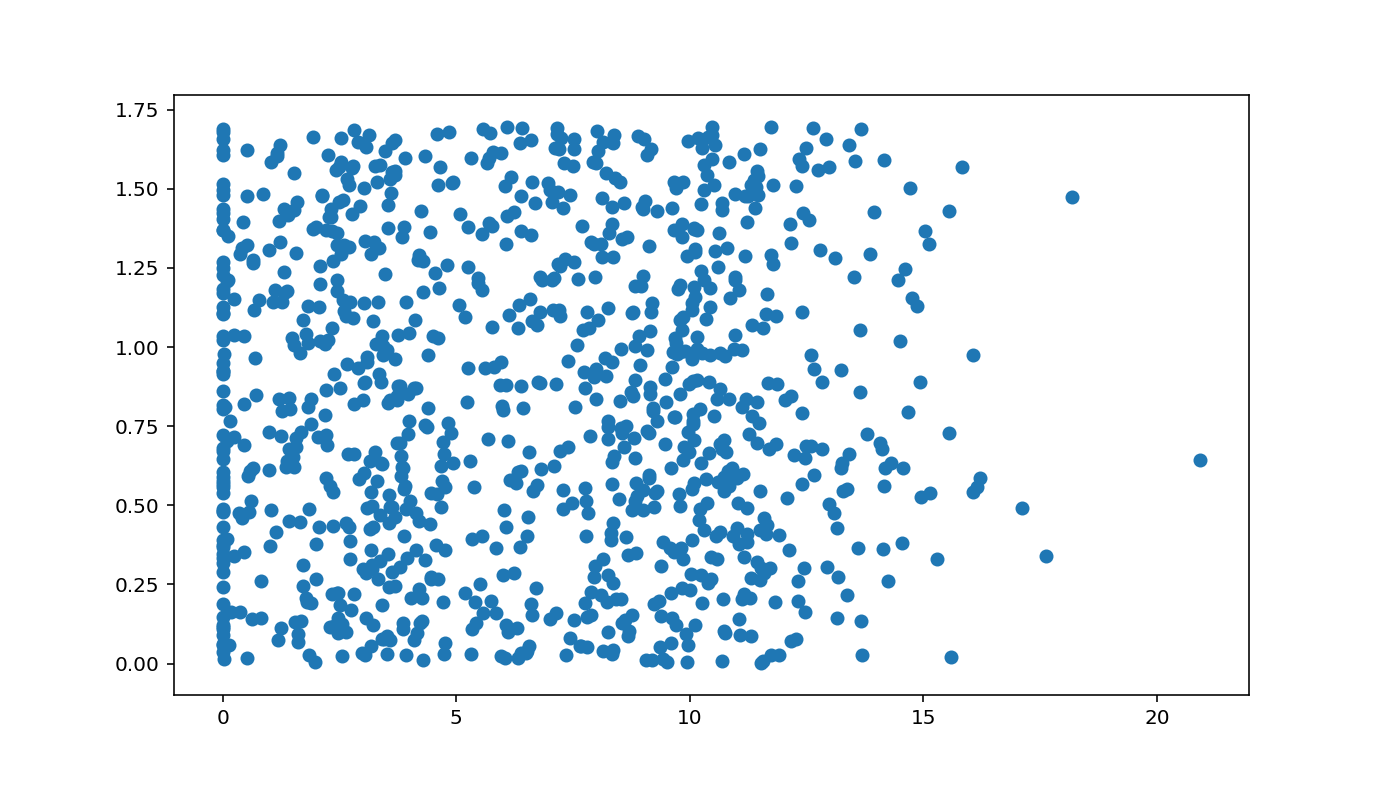

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 1],X[:, 2])

<IPython.core.display.Javascript object>


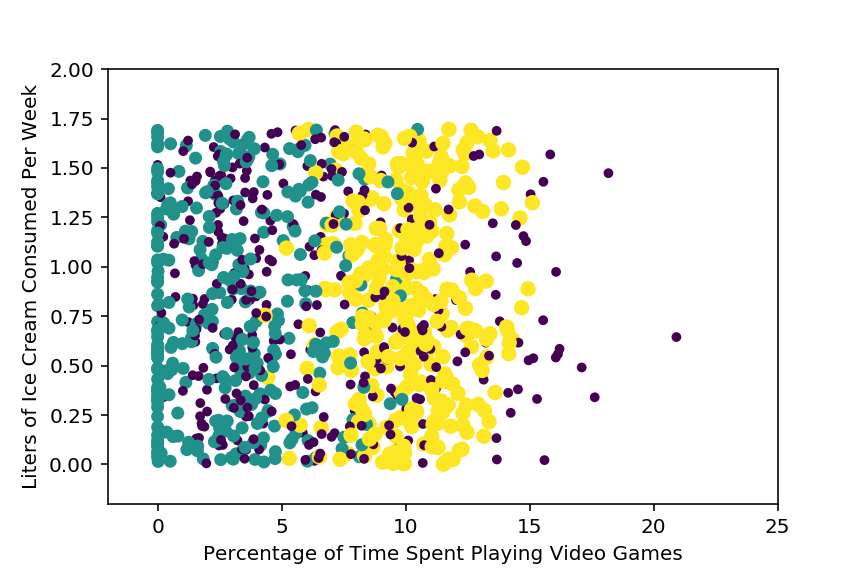

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X[:, 1], 
           X[:, 2], 
           15.0 * np.array(y), 
           15.0 * np.array(y))

ax.axis([-2,25,-0.2,2.0])

plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')

In [91]:
def auto_norm(dataset):
    min_val = dataset.min(0)
    max_val = dataset.max(0)
    ranges = max_val - min_val
    norm_data_set = np.zeros(np.shape(dataset))
    m = dataset.shape[0]
    norm_dataset = dataset - np.tile(min_val, (m, 1))
    norm_dataset = norm_dataset / np.tile(ranges, (m, 1))
    return norm_dataset, ranges, min_val

In [94]:
norm_mat, ranges, min_val = auto_norm(X)
norm_mat, ranges, min_val

(array([[ 0.44832535,  0.39805139,  0.56233353],
        [ 0.15873259,  0.34195467,  0.98724416],
        [ 0.28542943,  0.06892523,  0.47449629],
        ..., 
        [ 0.29115949,  0.50910294,  0.51079493],
        [ 0.52711097,  0.43665451,  0.4290048 ],
        [ 0.47940793,  0.3768091 ,  0.78571804]]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00]),
 array([ 0.      ,  0.      ,  0.001156]))

In [100]:
def dating_class_test():
    ho_ratio = 0.10
    X, y = open_file('datingTestSet.txt')
    norm_mat, ranges, min_val = auto_norm(X)
    m = norm_mat.shape[0]
    num_test_vectors = int(m * ho_ratio)
    error_count = 0.0
    for i in range(num_test_vectors):
        classifier_result = classify(norm_mat[i,:], norm_mat[num_test_vectors:m,:], y[num_test_vectors:m], 3)
        print('expected: {}, got: {}'.format(classifier_result, y[i]))
        if classifier_result != y[i]:
            error_count += 1
    print('total error rate: {}'.format(error_count / float(num_test_vectors)))

dating_class_test()

expected: 3, got: 3
expected: 2, got: 2
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 3, got: 3
expected: 3, got: 3
expected: 1, got: 1
expected: 3, got: 3
expected: 1, got: 1
expected: 1, got: 1
expected: 2, got: 2
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 2, got: 2
expected: 3, got: 3
expected: 2, got: 2
expected: 1, got: 1
expected: 3, got: 2
expected: 3, got: 3
expected: 2, got: 2
expected: 3, got: 3
expected: 2, got: 2
expected: 3, got: 3
expected: 2, got: 2
expected: 1, got: 1
expected: 3, got: 3
expected: 1, got: 1
expected: 3, got: 3
expected: 1, got: 1
expected: 2, got: 2
expected: 1, got: 1
expected: 1, got: 1
expected: 2, got: 2
expected: 3, got: 3
expected: 3, got: 3
expected: 1, got: 1
expected: 2, got: 2
expected: 3, got: 3
expected: 3, got: 3
expected: 3, got: 3
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 1, got: 1
expected: 2, got: 2
